#                        **Gradient Descent implementation from the scratch**

In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

### **Loading Boston dataset**

In [0]:
X = load_boston().data
Y = load_boston().target

### **Code implementation**

In [0]:
# cost variable stores loss value in each iteration, useful for ploting loss v/s iterations
cost=[]
class GradientDescent:
    def __init__(self, learning_rate, n_iter):
        self.learning_rate = learning_rate
        self.n_iter = n_iter

    def fit(self, X, Y):
        Y=Y.reshape(-1,1)
        # standardize the data        
        X = self.normalize(X)

        N= X.shape[0]
        np.random.seed(28)

        # Initialise random weights.
        W = np.random.normal(0,1,X.shape[1]).reshape(-1,1) #13*1
        # Initialize random value of Intercept
        b = np.random.normal(0,1,1)[0]
        learning_rate= self.learning_rate

        for iter_ in range(self.n_iter):
            #calculate gradients
            dLw = (-2/N)*np.matmul(X.T, (Y-np.matmul(X,W)-b))
            dLb = (-1/N)*(Y-np.dot(X,W)-b) # intercept should be scalar
            W = W - (learning_rate * dLw)
            b = b - (learning_rate * sum(dLb))
            error = mean_squared_error(Y, np.dot(X,W)+b)
            cost.append(error)
            #print("iter : {0}, error :{1} , intercept= {2}".format(iter_+1, error, b))
        self.coef_= W
        self.intercept_= b

    def normalize(self, X):
        sc = StandardScaler()
        X = sc.fit_transform(X)
        return X

    def predict(self, X):
        X=self.normalize(X)
        return np.dot(X,self.coef_)+self.intercept_


### **Comparision of results**

#### **Scratch code's Gradient Descent**

In [15]:
#learing rate
learning_rate=0.01
#no of iterations
n_iter=500

gd = GradientDescent(learning_rate=learning_rate, n_iter=n_iter)
gd.fit(X,Y)
pred= gd.predict(X)

print("Weights: ", gd.coef_," & Intercept: ", gd.intercept_)
print("MSE error : ", mean_squared_error(Y, gd.predict(X)) )

Weights:  [[-0.76121935]
 [ 0.88472784]
 [-0.29277136]
 [ 0.74502663]
 [-1.52786238]
 [ 2.87621452]
 [-0.10634081]
 [-2.8062878 ]
 [ 1.36976216]
 [-0.8641931 ]
 [-1.88936034]
 [ 0.86063672]
 [-3.67940582]]  & Intercept:  [22.37308921]
MSE error :  22.207430796607607


#### **LinearRegression from Sklearn**

In [8]:
from sklearn.linear_model import LinearRegression
clf= LinearRegression()
clf.fit(X,Y)
print("weights : ", clf.coef_ , " & Intercept : ", clf.intercept_)
print("MSE error : ",mean_squared_error(Y, clf.predict(X)))

weights :  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]  & Intercept :  36.459488385090125
MSE error :  21.894831181729202


### **Gradient Descent plot- Loss v/s Iterations**

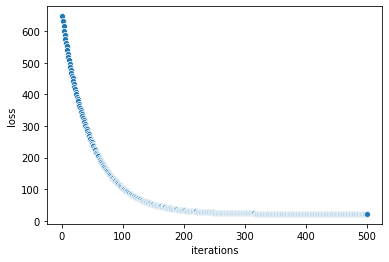

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(range(1,n_iter+1), cost)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.show()

### **Conclusion**

We can enhance the performance by adding more hyper-parameters.

Refer: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html 

In [17]:
from prettytable import PrettyTable
pt = PrettyTable(["","GradientDescent","LinearRegression"])
pt.add_row(["error(MSE)", 21.98, 21.89])
pt.add_row(["intercept", 22.37, 22.53])
pt.add_row(["n_iter", 500, "-"])
pt.add_row(["learning_rate", 0.01, "-"])
print(pt)

+---------------+-----------------+------------------+
|               | GradientDescent | LinearRegression |
+---------------+-----------------+------------------+
|   error(MSE)  |      21.98      |      21.89       |
|   intercept   |      22.37      |      22.53       |
|     n_iter    |       500       |        -         |
| learning_rate |       0.01      |        -         |
+---------------+-----------------+------------------+
